In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
####################################### Set Axes
def set_axes(ax_list, xlim, ylim):
    for ax in ax_list:
        
        ax.set_ylim(ylim)
        ax.set_xlim(xlim) 
        ax.tick_params(which='major', length=6, width=1.5, direction='out')
        ax.tick_params(which='minor', length=4, color='#000033', width=1.0, direction='out')  

        y_ax = ax.twinx()
        y_ax.set_ylim(ylim)
        y_ax.set_yticklabels([])
        y_ax.minorticks_on()
        y_ax.tick_params(which='major', length=6, width=1.5, direction='out')
        y_ax.tick_params(which='minor', length=4, color='#000033', width=1.0, direction='out')        

        x_ax = ax.twiny()
        x_ax.set_xlim(xlim)
        x_ax.set_xticklabels([])
        x_ax.minorticks_on()
        x_ax.tick_params(which='major', length=6, width=1.0, direction='out')
        x_ax.tick_params(which='minor', length=4, color='#000033', width=1.0, direction='out')     

        for tick in ax.xaxis.get_major_ticks():
                    tick.label.set_fontsize(14) 
        for tick in ax.yaxis.get_major_ticks():
                    tick.label.set_fontsize(14) 
####################################### Plotting Function

In [3]:
f = np.load("res.npz")
delta = f["arr_0"] # Density field in super galactic coordinates on grid 128x128x128 and box of 800 Mpc/h_75
v = f["arr_1"]     # velocity field in super galactic coordinates on grid 128x128x128 and box of 800 Mpc/h_75
assert(v.shape == (3,128,128,128))

Vx = v[0] # vsgx 128x128x128
Vy = v[1] # vsgy
Vz = v[2] # vsgz

x = np.linspace(0, 800, 128, endpoint=False)-400
y = np.linspace(0, 800, 128, endpoint=False)-400
z = np.linspace(0, 800, 128, endpoint=False)-400
xyz = np.meshgrid(x,y,z)
X = xyz[0] # 128x128x128
Y = xyz[1]
Z = xyz[2]

## Flattening
Vx = Vx.flatten()
Vy = Vy.flatten()
Vz = Vz.flatten()
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()
Density = delta.flatten()

(array([5.00000e+00, 1.00000e+01, 5.40000e+01, 1.34000e+02, 3.54000e+02,
        6.25000e+02, 1.20000e+03, 2.09300e+03, 3.96300e+03, 7.28100e+03,
        1.58880e+04, 1.24892e+05, 7.22675e+05, 9.08398e+05, 2.44339e+05,
        3.38870e+04, 1.23830e+04, 7.03800e+03, 4.23900e+03, 2.78700e+03,
        1.78300e+03, 1.26100e+03, 7.67000e+02, 5.12000e+02, 3.15000e+02,
        1.66000e+02, 6.70000e+01, 2.40000e+01, 9.00000e+00, 3.00000e+00]),
 array([-2.35568848, -2.1766856 , -1.99768272, -1.81867985, -1.63967697,
        -1.46067409, -1.28167121, -1.10266833, -0.92366546, -0.74466258,
        -0.5656597 , -0.38665682, -0.20765395, -0.02865107,  0.15035181,
         0.32935469,  0.50835757,  0.68736044,  0.86636332,  1.0453662 ,
         1.22436908,  1.40337196,  1.58237483,  1.76137771,  1.94038059,
         2.11938347,  2.29838634,  2.47738922,  2.6563921 ,  2.83539498,
         3.01439786]),
 <a list of 30 Patch objects>)

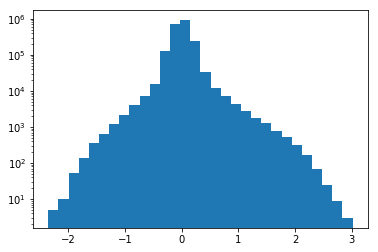

In [4]:
plt.hist(Density, bins=30, log=True)

In [15]:
from matplotlib.colors import LogNorm
from matplotlib import colors

def CF_plot(xy_d, xlabel='SGY [Mpc]', ylabel='SGZ [Mpc]', res = 6, scale=300):

    fig = plt.figure(figsize=(5, 5), dpi=100)
    ax = fig.add_axes([0.1,0.1,0.8,0.8])
    ax.tick_params('off')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    
    cmap = colors.ListedColormap(['blue', 'royalblue', 'dodgerblue', 'powderblue', 'antiquewhite', 'coral', 'orangered', 'maroon'])
    bounds=[-1.6, -1.2, -0.8, -0.4, 0, 0.4, 0.8, 1.2, 1.6]
    norm = colors.BoundaryNorm(bounds, cmap.N, clip=True)
    
    image_data = xy_d[:,:,2]
    scale_min = np.min(image_data)
    scale_max = np.max(image_data) 
    
#     image_data[np.where(image_data<=0)] = -1
#     image_data[np.where(image_data>0)] = 1
    
    imgplot = ax.imshow(image_data, cmap=cmap, norm=norm)

    
#     imgplot = ax.imshow(image_data)  
#     imgplot.set_cmap('nipy_spectral')

    ax.set_xlim(16,112)
    ax.set_ylim(16,112)


    Q = ax.quiver(xy_d[::res,::res,3], xy_d[::res,::res,4], xy_d[::res,::res,0], xy_d[::res,::res,1],
                   pivot='mid', units='x', angles='uv', scale=scale, headwidth=5, headlength=6, headaxislength=5)


    ax2 = fig.add_axes([0.09999,0.1,0.8,0.8])
    ax2.patch.set_alpha(0)

    # x = np.linspace(-500,500,50)
    # ax2.plot(x, x, 'r.')

    ax2.set_xlim(-300,300)
    ax2.set_ylim(-300,300)
    ax2.set_xlabel(xlabel, fontsize=16)
    ax2.set_ylabel(ylabel, fontsize=16)

#     ax2.tick_params('off')
#     ax2.set_xticklabels([])
#     ax2.set_yticklabels([])
#     ax2.set_xticks([])
#     ax2.set_yticks([])
    
    ax_ = fig.add_axes([0.85,0.1,0.2,0.8])
    ax_.set_axis_off()  
    ax_.set_xticks([])
    ax_.set_yticks([])
    ax_.xaxis.set_ticks_position('none')
    ax_.yaxis.set_ticks_position('none')    
    cbar = fig.colorbar(imgplot, extend='both')
    cbar.ax.set_ylabel(r'$Overdensity \/\/ \delta$', fontsize=12, labelpad=-60)
    
    ax.quiverkey(Q, 130, 14, 1000, r'$1000 \/\/ km\/s^{-1}$', coordinates='data', labelsep=0.05)

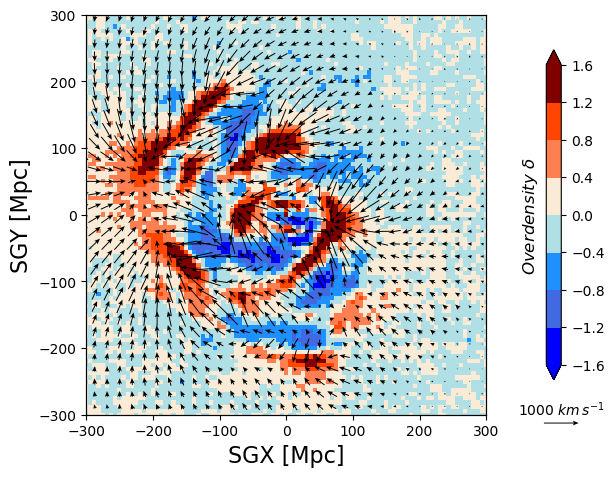

In [21]:
xy_d = np.zeros((128,128,5))
for ii in range(128):
    for jj in  range(128):
        for kk in [64]:
            qq=ii*128**2+jj*128+kk
            xy_d[ii,jj,0] += Vx[qq]
            xy_d[ii,jj,1] += Vy[qq]
            xy_d[jj,ii,2] += Density[qq]
        xy_d[ii,jj,3] = ii
        xy_d[ii,jj,4] = jj


CF_plot(xy_d, xlabel='SGX [Mpc]', ylabel='SGY [Mpc]', res=3, scale=120)

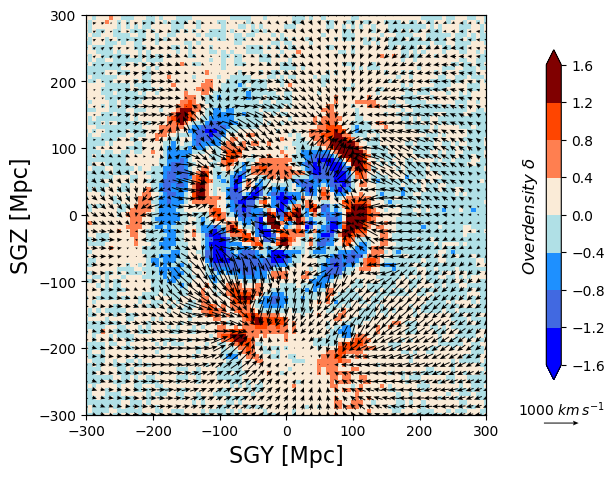

In [22]:
xy_d = np.zeros((128,128,5))
for jj in range(128):
    for kk in  range(128):
        for ii in [64]:
            qq=ii*128**2+jj*128+kk
            xy_d[jj,kk,0] += Vy[qq]
            xy_d[jj,kk,1] += Vz[qq]
            xy_d[kk,jj,2] += Density[qq]
        xy_d[jj,kk,3] = jj
        xy_d[jj,kk,4] = kk

CF_plot(xy_d, xlabel='SGY [Mpc]', ylabel='SGZ [Mpc]', res=2, scale=120)

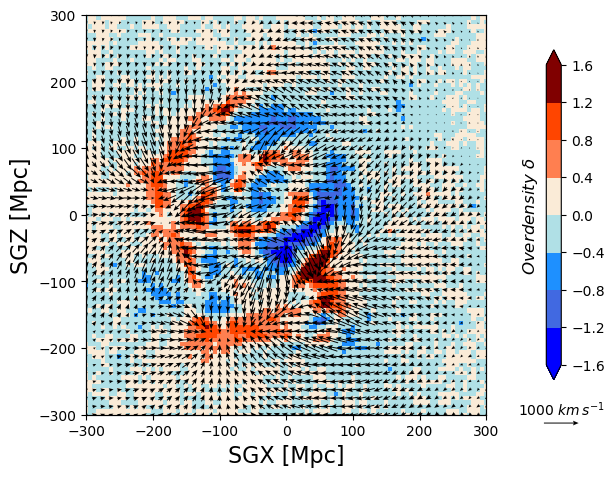

In [23]:
xy_d = np.zeros((128,128,5))
for ii in range(128):
    for kk in  range(128):
        for jj in [49]:
#         for jj in [64]:
            qq=ii*128**2+jj*128+kk
            xy_d[ii,kk,0] += Vx[qq]
            xy_d[ii,kk,1] += Vz[qq]
            xy_d[kk,ii,2] += Density[qq]
        xy_d[ii,kk,3] = ii
        xy_d[ii,kk,4] = kk

CF_plot(xy_d, xlabel='SGX [Mpc]', ylabel='SGZ [Mpc]', res=2, scale=120)